ใช้การจำลอง qbit ด้วย vector สองมิติ

In [1]:
import math
import numpy as np
import random
# %matplotlib inline
import matplotlib
matplotlib.use( 'tkagg' )
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook
import sys
import pickle

# ALGORITHM PARAMETERS
N = ขนาดของประชากร<br>
Genome = ความยาวจีโนม<br>
generation_max = จำนวนรุ่นประชากร<br>

In [2]:
N = 10  # Define here the population size
generation_max = 10000  # Define here the maximum number of generations/iterations

Genome = 0
stem_pool = []

# VARIABLES ALGORITHM     

In [3]:
popSize = N
genomeLength = Genome + 1

top_bottom = 2 #มิติเวคเตอร์
QuBitZero = np.array([[1], [0]])
QuBitOne = np.array([[0], [1]])

## RNA DECODER
### เข้ารหัส RNA
เข้ารหัส RNA ให้เป็น helix ที่เป็นไปได้โดยใช้ dynamic programming

In [4]:
# rna = "UACACUGUGGAUCCGGUGAGGUAGUAGGUUGUAUAGUUUGGAAUAUUACCACCGGUGAACUAUGCAAUUUUCUACCUUACCGGAGACAGAACUCUUCGA"
# rna = "CCCAGUGUUCAGACUACCUGUUCAGGAAGUAGUGGUUGUACAGUAGUCUGCACAUUGGUU"
rna = "UGCCUACUGAGCUGAUAACAGUUAGAUGUUAACAAGCACUGGCUCAGUUCAGCAGGAAC"
# rna = "GGGAAAUCC"
# rna = "CGGGGGAAGUCCG"
# rna = "GGGUUGGGAAGAAACUGUGGCACUUCGGUGCCAGCAACCC

In [5]:
rna_metrix = None
def decoder(rna):
    global stem_pool, Genome, genomeLength, rna_metrix
    ACCEPT_HELIX_LENGTH = 2
    rna_metrix = np.zeros((len(rna),len(rna)),dtype=int)
    for i in range(len(rna)):
        for j in range(i+1, len(rna)):
            if ((rna[i] == "G" and rna[j] == "C") or 
            (rna[i] == "C" and rna[j] == "G") or 
            (rna[i] == "A" and rna[j] == "U") or 
            (rna[i] == "U" and rna[j] == "A") or
            (rna[i] == "G" and rna[j] == "U") or 
            (rna[i] == "U" and rna[j] == "G")):
                rna_metrix[i, j] = 1
    for j in range(1, len(rna)):
        i = 0
        match = False
        while j-i > 0:
            if rna_metrix[i, j] == 1 and not match:
                start_helix = i
                end_helix = j
                helix_length = 1
                match = True
            elif rna_metrix[i, j] == 1 and match:
                helix_length += 1
            elif rna_metrix[i, j] == 0 and match:
                if end_helix-start_helix-(2*helix_length)+1 < 3: #Fixed loop with less than 2 base
                    helix_length = helix_length-(3-(end_helix-start_helix-(2*helix_length)+1))
                if helix_length >= ACCEPT_HELIX_LENGTH:
                    stem_pool.append((start_helix, end_helix, helix_length))
                match = False
            i += 1
            j -= 1
        if match and end_helix-start_helix-(2*helix_length)+1 < 3: #Fixed loop with less than 2 base
            helix_length = helix_length-(3-(end_helix-start_helix-(2*helix_length)+1))
        if match and helix_length >= ACCEPT_HELIX_LENGTH:
            stem_pool.append((start_helix, end_helix, helix_length))
    for i in range(1, len(rna)-1):
        j = len(rna)-1
        match = False
        while j-i > 0:
            if rna_metrix[i, j] == 1 and not match:
                start_helix = i
                end_helix = j
                helix_length = 1
                match = True
            elif rna_metrix[i, j] == 1 and match:
                helix_length += 1
            elif rna_metrix[i, j] == 0 and match:
                if end_helix-start_helix-(2*helix_length)+1 < 3: #Fixed loop with less than 2 base
                    helix_length = helix_length-(3-(end_helix-start_helix-(2*helix_length)+1))
                if helix_length >= ACCEPT_HELIX_LENGTH:
                    stem_pool.append((start_helix, end_helix, helix_length))
                match = False
            i += 1
            j -= 1
        if match and end_helix-start_helix-(2*helix_length)+1 < 3: #Fixed loop with less than 2 base
            helix_length = helix_length-(3-(end_helix-start_helix-(2*helix_length)+1))
        if match and helix_length >= ACCEPT_HELIX_LENGTH:
            stem_pool.append((start_helix, end_helix, helix_length))
    print(rna_metrix)
    print(stem_pool)

    Genome = len(stem_pool) - 1
    genomeLength = Genome + 1
    return True

In [6]:
print(decoder(rna))

[[0 1 0 ... 1 1 0]
 [0 0 1 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[(0, 8, 2), (1, 11, 2), (0, 13, 2), (3, 10, 2), (0, 16, 2), (4, 13, 2), (0, 19, 2), (4, 16, 2), (7, 13, 2), (1, 21, 2), (0, 23, 2), (3, 20, 2), (7, 16, 2), (5, 21, 4), (0, 27, 2), (3, 24, 3), (1, 28, 2), (0, 30, 2), (6, 24, 4), (4, 27, 2), (9, 22, 5), (0, 33, 2), (5, 28, 2), (4, 30, 2), (7, 27, 2), (11, 24, 5), (0, 37, 3), (7, 30, 3), (3, 35, 2), (9, 29, 3), (15, 23, 2), (12, 27, 2), (0, 40, 2), (7, 33, 2), (14, 26, 2), (6, 35, 2), (12, 30, 5), (1, 42, 3), (3, 41, 3), (7, 37, 2), (0, 45, 2), (12, 33, 2), (15, 30, 5), (10, 36, 3), (6, 41, 3), (1, 47, 2), (9, 39, 2), (19, 29, 3), (3, 46, 2), (12, 37, 2), (0, 50, 2), (5, 47, 9), (20, 32, 5), (0, 53, 3), (3, 51, 2), (15, 40, 2), (21, 34, 2), (8, 48, 2), (20, 36, 3), (2, 55, 3), (6, 51, 9), (3, 55, 2), (18, 40, 4), (6, 54, 3), (6, 55, 2), (13, 48, 3), (10, 52, 5), (19, 43, 6), (28, 34, 2), (26, 37, 4), (16, 48, 3), (11, 54

### Memoisation for select helix
helix_overlap คือ helix ที่ไม่ชนกับ helix อื่น ใช้เป็นเงื่อนไขการเลือกก่อนเข้า find_lowest_energy() <br>
helix_overlap_cross คือ helix ที่ไม่สามารถมีอยู่พร้อมกันได้ในกรณีที่ไม่มีการตัด helix <br>
helix_cross คือ helix ที่ไม่สามารถมีอยู่พร้อมกันได้ในทุกกรณี

In [7]:
helix_overlap = np.zeros((genomeLength, genomeLength), dtype=int)
for i in range(genomeLength):
    set_i1 = set([e for e in range(stem_pool[i][0], stem_pool[i][0]+stem_pool[i][2])])
    set_i2 = set([e for e in range(stem_pool[i][1], stem_pool[i][1]-stem_pool[i][2], -1)])
    set_i3 = set([e for e in range(stem_pool[i][0], stem_pool[i][1]+1)])
    for j in range(genomeLength):
        set_j1 = set([e for e in range(stem_pool[j][0], stem_pool[j][0]+stem_pool[j][2])])
        set_j2 = set([e for e in range(stem_pool[j][1], stem_pool[j][1]-stem_pool[j][2], -1)])
        set_j3 = set([e for e in range(stem_pool[j][0], stem_pool[j][1]+1)])
        if set_i1.intersection(set_j1) == set() and set_i1.intersection(set_j2) == set() and\
        set_i2.intersection(set_j1) == set() and set_i2.intersection(set_j2) == set() and\
        (set_i3.intersection(set_j3) == set() or set_i3.intersection(set_j3) == set_i3 or set_i3.intersection(set_j3) == set_j3):
            helix_overlap[i, j] = 0
        else:
            helix_overlap[i, j] = 1
            
helix_overlap_cross = np.zeros((genomeLength, genomeLength), dtype=int)
for i in range(genomeLength):
    set_i3 = set([e for e in range(stem_pool[i][0], stem_pool[i][1]+1)])
    for j in range(genomeLength):
        set_j3 = set([e for e in range(stem_pool[j][0], stem_pool[j][1]+1)])
        if (set_i3.intersection(set_j3) == set()) or\
        (stem_pool[j][0]-stem_pool[i][0]<-1 and stem_pool[j][1]-stem_pool[i][1]>1) or\
        (stem_pool[j][0]+stem_pool[j][2]-(stem_pool[i][0]+stem_pool[i][2])>1 and stem_pool[j][1]-stem_pool[j][2]-(stem_pool[i][1]-stem_pool[i][2])<-1):
            helix_overlap_cross[i, j] = 0
        else:
            helix_overlap_cross[i, j] = 1
            
helix_cross = np.zeros((genomeLength, genomeLength), dtype=int)
for i in range(genomeLength):
    for j in range(genomeLength):
        if (stem_pool[j][0]>stem_pool[i][0]+stem_pool[i][2]-1 and stem_pool[j][0]+stem_pool[j][2]-1<stem_pool[i][1]-stem_pool[i][2]+1) ^\
        (stem_pool[j][1]-stem_pool[j][2]+1>stem_pool[i][0]+stem_pool[i][2]-1 and stem_pool[j][1]<stem_pool[i][1]-stem_pool[i][2]+1):
            helix_cross[i, j] = 1
        else:
            helix_cross[i, j] = 0

In [8]:
print(helix_overlap)
print(helix_overlap_cross)
print(helix_cross)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## QUANTUM POPULATION INITIALIZATION
### สร้าง population

qpv คือ quantum chromosome หรือ population vector <br>
เป็น array ของ ประชากรแต่ละตัว

In [9]:
qpv = np.empty([popSize, genomeLength, top_bottom])
nqpv = np.empty([popSize, genomeLength, top_bottom])

chromosome เก็บ clssical bit ที่แปลงมาจาก qbit

In [10]:
chromosome = np.empty([popSize, genomeLength], dtype=np.int)

นำ qbit ในแต่ละ qbit ในทุกๆ population ผ่าน Hadamard (H) gate เพื่อให้อยู่ในสถานะ superposition

In [11]:
def Init_population():
#     theta = (math.pi)/(0.1*2*genomeLength)
    theta =  (math.acos(math.sqrt(1-(1/(genomeLength))))/2)
    rot = np.empty([2, 2])
    rot[0, 0] = math.cos(theta)
    rot[0, 1] = -math.sin(theta)
    rot[1, 0] = math.sin(theta)
    rot[1, 1] = math.cos(theta)
    for i in range(0, popSize):
        for j in range(0, genomeLength):
            qpv[i, j, 0] = (rot[0][0] * QuBitZero[0]) + (rot[0][1] * QuBitZero[1])
            qpv[i, j, 1] = (rot[1][0] * QuBitZero[0]) + (rot[1][1] * QuBitZero[1])


In [12]:
Init_population()

## MEASURE QBIT TO CLASSICAL BIT
### แปลง qbit เป็น classical bit
นำ qbit ใน qpv มาแปลงเป็น classical bit แล้วนำไปเก็บใน chromosome

In [13]:
pop = np.empty([popSize, genomeLength])

In [14]:
def Measure():
    for i in range(0, popSize):
        for j in range(0, genomeLength):
            rand = random.random()
            if rand <= qpv[i, j, 0]**2:
                chromosome[i, j] = 0
                pop[i, j] = 0
            else:
                chromosome[i, j] = 1
                pop[i, j] = rand

In [15]:
Measure()

In [16]:
print(pop)

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.9993748 0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


## INNHB model
 
individual nearest neighbor hydrogen bond for calculate free energy

In [17]:
watson_crick_para = {("AA", "UU"): -0.93,
                          ("UU", "AA"): -0.93,
                          ("AU", "UA"): -1.10,
                          ("UA", "AU"): -1.33,
                          ("CU", "GA"): -2.08,
                          ("AG", "UC"): -2.08,
                          ("CA", "GU"): -2.11,
                          ("UG", "AC"): -2.11,
                          ("GU", "CA"): -2.24,
                          ("AC", "UG"): -2.24,
                          ("GA", "CU"): -2.35,
                          ("UC", "AG"): -2.35,
                          ("CG", "GC"): -2.36,
                          ("GG", "CC"): -3.26,
                          ("CC", "GG"): -3.26,
                          ("GC", "CG"): -3.42,
                          ("AG", "UU"): -0.55,
                          ("UU", "GA"): -0.55,
                          ("AU", "UG"): -1.36,
                          ("GU", "UA"): -1.36,
                          ("CG", "GU"): -1.41,
                          ("UG", "GC"): -1.41,
                          ("CU", "GG"): -2.11,
                          ("GG", "UC"): -2.11,
                          ("GG", "CU"): -1.53,
                          ("UC", "GG"): -1.53,
                          ("GU", "CG"): -2.51,
                          ("GC", "UG"): -2.51,
                          ("GA", "UU"): -1.27,
                          ("UU", "AG"): -1.27,
                          ("GG", "UU"): -0.5,
                          ("UU", "GG"): -0.5,
                          ("GU", "UG"): +1.29,
                          ("UG", "AU"): -1,
                          ("UA", "GU"): -1,
                          ("UG", "GU"): +0.3}

def INNHB(helix):
    global watson_crick_para
    energy = 0
    for k in range(helix[2]-1):
#         print(rna[helix[0]+k]+rna[helix[0]+1+k], rna[helix[1]-k]+rna[helix[1]-1-k])
        if (rna[helix[0]+k]+rna[helix[0]+1+k], rna[helix[1]-k]+rna[helix[1]-1-k]) in watson_crick_para:
#             print((rna[helix[0]+k]+rna[helix[0]+1+k], rna[helix[1]-k]+rna[helix[1]-1-k]), watson_crick_para[(rna[helix[0]+k]+rna[helix[0]+1+k], rna[helix[1]-k]+rna[helix[1]-1-k])])
            energy += watson_crick_para[(rna[helix[0]+k]+rna[helix[0]+1+k], rna[helix[1]-k]+rna[helix[1]-1-k])]
        elif (rna[helix[1]-k]+rna[helix[1]-1-k], rna[helix[0]+k]+rna[helix[0]+1+k]) in watson_crick_para:
#             print((rna[helix[1]-k]+rna[helix[1]-1-k], rna[helix[0]+k]+rna[helix[0]+1+k]), watson_crick_para[(rna[helix[1]-k]+rna[helix[1]-1-k], rna[helix[0]+k]+rna[helix[0]+1+k])])
            energy += watson_crick_para[(rna[helix[1]-k]+rna[helix[1]-1-k], rna[helix[0]+k]+rna[helix[0]+1+k])]
        else:
            print("Error in fitness function")
            energy += 0
        
    # HB model
    if rna[helix[0]] == 'A' and rna[helix[1]] == 'U':
        energy += 0.45
    elif rna[helix[0]] == 'U' and rna[helix[1]] == 'A':
        energy += 0.45
    if rna[helix[0]+helix[2]-1] == 'U' and rna[helix[1]-helix[2]+1] == 'A':
        energy += 0.45
    elif rna[helix[0]+helix[2]-1] == 'A' and rna[helix[1]-helix[2]+1] == 'U':
        energy += 0.45
        
#     elif rna[helix[0]] == 'G' and rna[helix[1]] == 'U':
#         energy += 0.45
#     elif rna[helix[0]] == 'U' and rna[helix[1]] == 'G':
#         energy += 0.45
#     elif rna[helix[0]+helix[2]-1] == 'U' and rna[helix[1]-helix[2]+1] == 'G':
#         energy += 0.45
#     elif rna[helix[0]+helix[2]-1] == 'G' and rna[helix[1]-helix[2]+1] == 'U':
#         energy += 0.45
    # symmetry correction
    if rna[helix[0]:helix[0]+helix[2]] == rna[helix[1]-helix[2]+1:helix[1]+1]:
        energy += 0.43
#     print("watson", helix, "energy = ", energy)
    return energy

### Terminal mismatch
terminal - string length 2 contains last nucleotide of helix before mismatch<br>
mismatch - string length 2 contains first mitmatch nucleotide<br>
5'––>3'<br>
terminal[0] mismatch[0]<br>
terminal[1] mismatch[1]<br>
3'<––5'<br>

In [18]:
terminal_mismatch_para = {"AU": np.array([[-0.8, -1.0, -0.8, -1.0],
                                                                [-0.6, -0.7, -0.6, -0.7],
                                                                [-0.8, -1.0, -0.8, -1.0],
                                                                [-0.6, -0.8, -0.6, -0.8]]),
                                         "CG": np.array([[-1.5, -1.5, -1.4, -1.5],
                                                                [-1.0, -1.1, -1.0, -0.8],
                                                                [-1.4, -1.5, -1.6, -1.5],
                                                                [-1.0, -1.4, -1.0, -1.2]]),
                                         "GC": np.array([[-1.1, -1.5, -1.3, -1.5],
                                                                [-1.1, -0.7, -1.1, -0.5],
                                                                [-1.6, -1.5, -1.4, -1.5],
                                                                [-1.1, -1.0, -1.1, -0.7]]),
                                         "GU": np.array([[-0.3, -1.0, -0.8, -1.0],
                                                                [-0.6, -0.7, -0.6, -0.7],
                                                                [-0.6, -1.0, -0.8, -1.0],
                                                                [-0.6, -0.8, -0.6, -0.6]]),
                                         "UA": np.array([[-1.0, -0.8, -1.1, -0.8],
                                                                [-0.7, -0.6, -0.7, -0.5],
                                                                [-1.1, -0.8, -1.2, -0.8],
                                                                [-0.7, -0.6, -0.7, -0.5]]),
                                         "UG": np.array([[-1.0, -0.8, -1.1, -0.8],
                                                                [-0.7, -0.6, -0.7, -0.5],
                                                                [-0.5, -0.8, -0.8, -0.8],
                                                                [-0.7, -0.6, -0.7, -0.5]])}
def terminal_mismatch(terminal, mismatch):
    mismatch_0 = "ACGU".find(mismatch[0])
    mismatch_1 = "ACGU".find(mismatch[1])
    return terminal_mismatch_para[terminal][mismatch_0, mismatch_1]

### Hairpin Loop energy calculation
- DESTABILIZING ENERGIES BY SIZE OF LOOP<br>
    if size>9 use Ginit(n) = Ginit(9)+1.75 RT ln(n/9)
- penalty for the all-C loop terms
- special hairpin loops
- terminal mismatch
- UU or GA or GG first mismatch
- special GU closure

In [19]:
size_loop_para = {3:5.4, 4:5.6, 5:5.7, 6:5.4, 7:6, 8:5.5, 9:6.4}
R = 1.9858775*0.001 #Gas constance (kcal/K mol)
T = 273.15+37 #Temperature (K)

special_hairpin_para = {"CAACG":6.8, "GUUAC":6.9, "CUACGG":2.8, "CUCCGG":2.7,
                       "CUUCGG":3.7, "CUUUGG":3.7, "CCAAGG":3.3, "CCCAGG":3.4, "CCGAGG":3.5,
                       "CCUAGG":3.7, "CCACGG":3.7, "CCGCGG":3.6, "CCUCGG":2.5, "CUAAGG":3.6,
                       "CUCAGG":3.7, "CUUAGG":3.5, "CUGCGG":2.8, "CAACGG":5.5, "ACAGUGCU": 2.9,
                       "ACAGUGAU":3.6, "ACAGUGUU":1.8, "ACAGUACU":2.8}

def hairpin(start, end):
    # special hairpin loops
    if rna[start-1:end+2] in special_hairpin_para:
#         print("special hairpin loops")
        return special_hairpin_para[rna[start-1:end+2]]
    
    energy = 0
    length = end-start+1
    
    # DESTABILIZING ENERGIES BY SIZE OF LOOP
    try: 
        energy += size_loop_para[length]
    except KeyError:
        if length >= 9:
            energy += 6.4+(1.75*R*T*math.log(length/9))
                           
    # penalty for the all-C loop terms
    if rna[start:end+1] == "C"*(length):
#         print("penalty for the all-C loop terms")
        if length == 3:
            energy += 1.5
        else:
            energy += (0.3*length)+1.6
                           
    # terminal mismatch
    energy +=terminal_mismatch(rna[start-1]+rna[end+1], rna[start]+rna[end])
                           
    # UU or GA or GG first mismatch
    if rna[start]+rna[end] in ["GG", "GA"]:
#         print("UU or GA or GG first mismatch")
        energy += -0.8
                           
    # special GU closure
    if rna[start-1]+rna[end+1] == "GU":
#         print("special GU closure")
        energy += -2.2
    
    return energy

### Bulge Loop energy calculation

In [20]:
size_bulge_para = {1:3.81, 2:2.8, 3:3.2, 4:3.6, 5:4.0, 6:4.4}
def bulge(start, end, l , r):
    
    energy = 0
    length = end-start+1
    
    # DESTABILIZING ENERGIES BY SIZE OF LOOP
    try: 
        energy += size_bulge_para[length]
    except KeyError:
        if length >= 7:
            energy += 4.4+(1.75*R*T*math.log(length/6))
    
    if  length == 1:
        # special C bulge
        if rna[start] == "C":
            energy += -0.9
        # base pair stack
        if l>end:
            energy += watson_crick_para[(rna[start-1]+rna[end+1], rna[r]+rna[l])]
        else:
            energy += watson_crick_para[(rna[l]+rna[r], rna[start+1]+rna[end-1])]
        # number of states
        state = 1
        while True: #เลื่อนไปทางซ้าย
            if rna[start-1] == rna[start] and start>0:
                state += 1
                start -= 1
            else:
                break
        while True: #เลื่อนไปทางขวา
            if rna[end+1] == rna[end] and end<len(rna)-2:
                state += 1
                end += 1
            else:
                break
            energy -= R*T*math.log(state)
        # Fixed Au/Gu Closure
        if ((rna[start-1] == "A" and rna[r] == "U") or (rna[start-1] == "U" and rna[r] == "A")):
            energy -= 0.45
        if ((rna[end+1] == "A" and rna[l] == "U") or (rna[end+1] == "U" and rna[l] == "A")):
            energy -= 0.45
    return energy

### Internal loop energy calculation
internal 1x1 loop ("AA", "UU", X, Y)
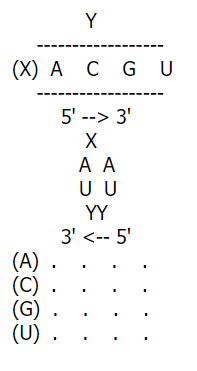
internal 1x2 loop ("AA", "UU", X, YY)
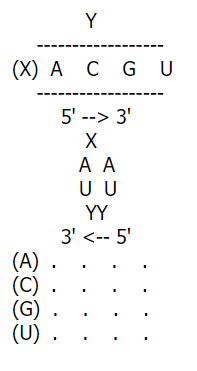
Exception: free energy and enthalpy changes for first mismatches in 1×(n-1) internal loops are 0 kcal/mol.

In [21]:
size_internal_para = {4:1.1, 5:2.0, 6:2.0}

with open('internal1x1.pickle', 'rb') as f:
    internal_1x1 = pickle.load(f)
f.close()

with open('internal1x2.pickle', 'rb') as f:
    internal_1x2 = pickle.load(f)
f.close()

with open('internal2x2.pickle', 'rb') as f:
    internal_2x2 = pickle.load(f)
f.close()

def internal(start1, end1, start2, end2):
    purine = "AG"
    pyrimidine = "CU"
    length1 = end1-start1+1
    length2 = start2-end2+1
    energy = 0
    
    if length1 == 1 and length2 == 1:
        energy += internal_1x1[(rna[start1-1]+rna[end1+1], rna[start2+1]+rna[end2-1], rna[start1], rna[start2])]
    elif  length1 == 1 and length2 == 2:
        energy += internal_1x2[(rna[start1-1]+rna[end1+1], rna[start2+1]+rna[end2-1], rna[start1], rna[end2:start2+1])]
    elif length1 == 2 and length2 == 1:
        energy += internal_1x2[(rna[end2-1]+rna[start2+1], rna[end1+1]+rna[start1-1], rna[start2], rna[end1:start1-1:-1])]
    elif length1 == 2 and length2 == 2:
        energy += internal_2x2[(rna[start1-1]+rna[end1+1], rna[start2+1]+rna[end2-1], rna[start1:end1+1], rna[end2:start2+1])]
    else:
        # initialization
        if length1+length2 in size_internal_para:
            energy += size_internal_para[length1+length2]
        elif length1+length2>6:
            energy += 2.0+1.08*math.log((length1+length2)/6)
        else: print("error in internal loop energy calculation")
        # asymetry
        energy += 0.6*abs(length1-length2)
        # terminal mismatch
        if (length1 == 2 and length2 == 3) or (length1 == 3 and length2 == 2):
            if rna[start1]=="A" and rna[start2]=="G":
                if rna[start1-1] in purine and rna[start2+1] in pyrimidine:
                    energy += 0.0
                elif rna[start1-1] in pyrimidine and rna[start2+1] in purine:
                    energy -= 0.5
            elif rna[start1]=="G" and rna[start2]=="A":
                if rna[start1-1] in purine and rna[start2+1] in pyrimidine:
                    energy -= 1.2
                elif rna[start1-1] in pyrimidine and rna[start2+1] in purine:
                    energy -= 1.1
            elif rna[start1]=="G" and rna[start2]=="G":
                energy -= 0.8
            elif rna[start1]=="U" and rna[start2]=="U":
                energy -= 0.4
            
            if rna[end1]=="A" and rna[end2]=="G":
                if rna[end2+1] in purine and rna[end1-1] in pyrimidine:
                    energy += 0.0
                elif rna[end2+1] in pyrimidine and rna[end1-1] in purine:
                    energy -= 0.5
            elif rna[end1]=="G" and rna[end2]=="A":
                if rna[end2+1] in purine and rna[end1-1] in pyrimidine:
                    energy -= 1.2
                elif rna[end2+1] in pyrimidine and rna[end1-1] in purine:
                    energy -= 1.1
            elif rna[end1]=="G" and rna[end2]=="G":
                energy -= 0.8
            elif rna[end1]=="U" and rna[end2]=="U":
                energy -= 0.4
                
        else:
            if rna[start1]=="A" and rna[start2]=="G":
                energy -= 0.8
            elif rna[start1]=="G" and rna[start2]=="A":
                energy -= 1.0
            elif rna[start1]=="G" and rna[start2]=="G":
                energy -= 1.2
            elif rna[start1]=="U" and rna[start2]=="U":
                energy -= 0.7
                
            if rna[end1]=="A" and rna[end2]=="G":
                energy -= 0.8
            elif rna[end1]=="G" and rna[end2]=="A":
                energy -= 1.0
            elif rna[end1]=="G" and rna[end2]=="G":
                energy -= 1.2
            elif rna[end1]=="U" and rna[end2]=="U":
                energy -= 0.7
        
    # Fixed Au/Gu Closure
    if (rna[start1-1]=="A" and rna[start2+1]=="U") or (rna[start1-1]=="U" and rna[start2+1]=="A"):
        energy -= 0.45
    elif (rna[start1-1]=="G" and rna[start2+1]=="U") or (rna[start1-1]=="U" and rna[start2+1]=="G"):
        energy -= 0.45
    if (rna[end1+1]=="A" and rna[end2-1]=="U") or (rna[end1+1]=="U" and rna[end2-1]=="A"):
        energy -= 0.45
    elif (rna[end1+1]=="G" and rna[end2-1]=="U") or (rna[end1+1]=="U" and rna[end2-1]=="G"):
        energy -= 0.45
            
    return energy

### Multibranch loop energy calculation

In [22]:
multibranch_a = 9.25
multibranch_b = 0.91
multibranch_c = -0.63
multibranch_strain = 3.14
def multibranch(mismatches):
    energy = 0
    # average asymmetry
    average_asymmetry = 0
    for i in range(len(mismatches)-1,-1,-1):
        average_asymmetry += abs((mismatches[i][1]-mismatches[i][0])-(mismatches[i-1][1]-mismatches[i-1][1]))
    average_asymmetry = min(2, average_asymmetry/len(mismatches))
    
    energy += multibranch_a+average_asymmetry*multibranch_b+len(mismatches)*multibranch_c
    
    # three-way branching loops with fewer than two unpaired nucleotides
    if len(mismatches) == 3:
        unpaired_nucleotides = 0
        for i, j in mismatches:
            unpaired_nucleotides += j-i-2
        if unpaired_nucleotides < 2:
            energy += multibranch_strain
            
    # terminal mismatch
    for i in range(len(mismatches)-1,-1,-1):
        energy += terminal_mismatch(rna[mismatches[i][0]]+rna[mismatches[i-1][1]], rna[mismatches[i][0]+1]+rna[mismatches[i-1][1]-1])
    return energy

### Loop energy calculation

In [23]:
def loop_energy(dot_notation):
    start = end = 0
    energy = 0.0
    is_hairpin = False
    is_left_loop = False
    is_right_loop = False
    is_multibranch_loop = False
    multibranch_loop_set = set()
#     print("".join(dot_notation))
    for i in range(len(dot_notation)-1):
        if dot_notation[i] == "." and dot_notation[i+1] == ".":
            pass
        elif dot_notation[i] == "." and dot_notation[i+1] == "(":
            if is_left_loop:
                count = 1
                for j in range(i+2, len(dot_notation)):
                    if dot_notation[j] == "(": count +=1
                    elif dot_notation[j] == ")": count -= 1
                    if count == 0:
                        if dot_notation[j+1] == ")":
                            try:
                                e = bulge(start, i, j, j+1)
                                energy += e
#                                 print("bulge", start, i, j, j+1, "energy = ", e)
                            except Exception as err:
                                print("".join(dot_notation))
                                print("bulge", start, i, j, j+1)
                                print(err)
                                sys.exit(1)
                            start = 0
                            break
                        elif dot_notation[j+1] == ".":
                            end2 = j+1
                            start2 = j+1
                            while  dot_notation[start2+1] == ".":
                                start2 += 1
                            if dot_notation[start2+1] == ")":
                                try:
                                    e = internal(start,i,start2,end2)
                                    energy += e
#                                     print("internal", start, i, start2, end2, "energy = ",e)
                                except Exception as err:
                                    print("".join(dot_notation))
                                    print("internal", start, i, start2, end2)
                                    print(err)
                                    sys.exit(1)
                                start = 0
                            break
                        break
            
            if is_multibranch_loop:
            # Multi branch check
                j = 1
                position = i+2
                multi_start = None
                multi_end = None
                multi_start_count = False
                multibranch_loop = [(start-1, i+1)]
                while j>=0:
                    if position >= len(dot_notation):
                        is_multibranch_loop = False
                        break
                    if j == 0 and not multi_start_count:
                        multi_start_count = True
                        multi_start = position-1
                    if j == 0 and multi_start_count and dot_notation[position] != ".":
                        multibranch_loop.append((multi_start, position))
                        multi_start_count = False
                    if dot_notation[position] == "(":
                        j += 1
                    elif dot_notation[position] == ")":
                        j -= 1
                    position += 1
                j = 1
                position = start-2
                multi_start = None
                multi_end = None
                multi_start_count = False
                while j>=0:
                    if position < 0:
                        is_multibranch_loop = False
                        break
                    if j == 0 and not multi_start_count:
                        multi_start_count = True
                        multi_start = position+1
                    if j == 0 and multi_start_count and dot_notation[position] != ".":
                        multibranch_loop = [(position, multi_start)]+multibranch_loop
                        multi_start_count = False
                    if dot_notation[position] == ")":
                        j += 1
                    elif dot_notation[position] == "(":
                        j -= 1
                    position -= 1
            if is_multibranch_loop:
                multibranch_loop_set.add(tuple(multibranch_loop))
                is_multibranch_loop = False
            
            is_left_loop = False
            is_hairpin = False
            is_right_loop = False
            
        elif dot_notation[i] == "." and dot_notation[i+1] == ")":
            if is_hairpin:
                try:
                    e = hairpin(start, i)
                    energy += e
#                   print("hairpin", start, i, "energy = ", e)
                except Exception as err:
                    print("".join(dot_notation))
                    print("hairpin", start, i)
                    print(err)
                    sys.exit(1)
                start = 0
            if is_right_loop:
                count = 1
                for j in range(start-2, -1, -1):
                    if dot_notation[j] == ")": count +=1
                    elif dot_notation[j] == "(": count -= 1
                    if count == 0:
                        if dot_notation[j-1] == "(":
                            try:
                                e = bulge(start, i, j-1, j)
                                energy += e
#                                 print("bulge", start, i, j-1, j, "energy = ", e)
                            except Exception as err:
                                print("".join(dot_notation))
                                print("bulge", start, i, j-1, j)
                                print(err)
                                sys.exit(1)
                            start = 0
                        break
            is_hairpin = False
            is_left_loop = False
            is_right_loop = False
            is_multibranch_loop = False
        elif dot_notation[i] == "(" and dot_notation[i+1] == ".":
            is_hairpin = True
            is_left_loop = True
            start = i+1
            is_right_loop = False
            is_multibranch_loop = False
        elif dot_notation[i] == "(" and dot_notation[i+1] == "(":
            is_hairpin = False
            is_left_loop = False
            is_right_loop = False
            is_multibranch_loop = False
        elif dot_notation[i] == "(" and dot_notation[i+1] == ")":
            is_hairpin = False
            is_left_loop = False
            is_right_loop = False
        elif dot_notation[i] == ")" and dot_notation[i+1] == ".":
            is_hairpin = False
            is_left_loop = False
            is_right_loop = True
            start = i+1
            is_multibranch_loop = True
        elif dot_notation[i] == ")" and dot_notation[i+1] == "(":
            is_hairpin = False
            is_left_loop = False
            is_right_loop = False

            # Multi branch check
            j = 1
            position = i+2
            multi_start = None
            multi_end = None
            multi_start_count = False
            multibranch_loop = [(i, i+1)]
            while j>=0:
                if position >= len(dot_notation):
                    is_multibranch_loop = False
                    break
                if j == 0 and not multi_start_count:
                    multi_start_count = True
                    multi_start = position-1
                if j == 0 and multi_start_count and dot_notation[position] != ".":
                    multibranch_loop.append((multi_start, position))
                    multi_start_count = False
                if dot_notation[position] == "(":
                    j += 1
                elif dot_notation[position] == ")":
                    j -= 1
                position += 1
            j = 1
            position = i-1
            multi_start = None
            multi_end = None
            multi_start_count = False
            while j>=0:
                if position < 0:
                    is_multibranch_loop = False
                    break
                if j == 0 and not multi_start_count:
                    multi_start_count = True
                    multi_start = position+1
                if j == 0 and multi_start_count and dot_notation[position] != ".":
                    multibranch_loop = [(position, multi_start)]+multibranch_loop
                    multi_start_count = False
                if dot_notation[position] == ")":
                    j += 1
                elif dot_notation[position] == "(":
                    j -= 1
                position -= 1
            if is_multibranch_loop:
                multibranch_loop_set.add(tuple(multibranch_loop))
                is_multibranch_loop = False
            
            is_multibranch_loop = False
                
        elif dot_notation[i] == ")" and dot_notation[i+1] == ")":
            is_hairpin = False
            is_left_loop = False
            is_right_loop = False
            is_multibranch_loop = False
    
    for i in multibranch_loop_set:
        try:
            e = multibranch(i)
            energy += e
#             print("multibranch : ", i, "energy = ", e)
        except Exception as err:
            print("".join(dot_notation))
            print("multibranch : ", i)
            print(err)
            sys.exit(1)
    return energy

## PERFORMANCE GRAPH  

<IPython.core.display.Javascript object>


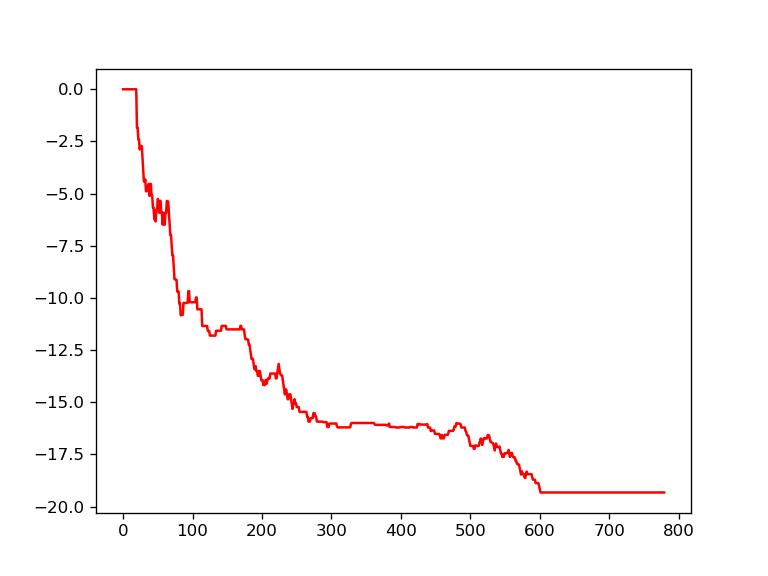

In [24]:
# def plot_Output():
#     data = np.loadtxt('output2.dat')
#     plt.plot(np.arange(generation_max), fitness_avg_data, fitness_max_data)
#     plt.xlabel('Generation')
#     plt.ylabel('Free Energy')
#     plt.xlim(0.0, 2000)
#     plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)   #top left
# ax2 = fig.add_subplot(312)   #top right
# ax3 = fig.add_subplot(313)

plt.ion()

fig.show()
fig.canvas.draw()

moving_avg_fitness = np.zeros(generation_max)
moving_avg_fitness_max = np.zeros(generation_max)
helix_use_avg = np.zeros(generation_max)
moving_range = 20

def plot_Output():
    global generation
    if generation < moving_range:
        moving_avg_fitness[generation] = np.mean(fitness_avg_data[:generation+1])
    else:
        moving_avg_fitness[generation] = np.mean(fitness_avg_data[generation-moving_range:generation+1])
        moving_avg_fitness_max[generation] = np.mean(fitness_max_data[generation-moving_range:generation])
    
    ax.clear()
#     ax2.clear()
    ax.plot(np.arange(generation), moving_avg_fitness_max[:generation], "r-")
    fig.canvas.draw()

### Test helix
ทดสอบว่า helix ใส่ได้หรือไม่

In [25]:
def test_helix(use_helix, test):
    for helix in use_helix:
        if (helix[0]>test[0]+test[2]-1 and  helix[0]+ helix[2]-1<test[1]-test[2]+1) ^\
        (helix[1]- helix[2]+1>test[0]+test[2]-1 and  helix[1]<test[1]-test[2]+1):
            return False
    return True

## Depth first search to find lowest energy of population

In [26]:
import copy
f_lowest_energy = np.Infinity
f_use_helix = []
f_dot_notation = ""

def find_lowest_energy(possible_helix=[], find_energy=0, dot_notation=["." for x in range(len(rna))], use_helix=[], use_test_helix=[]):

    global f_lowest_energy, f_use_helix, f_dot_notation
    
    if not possible_helix:
#         print("helix energy = ", find_energy)
        find_energy += loop_energy(dot_notation)
        if find_energy < f_lowest_energy:
            f_lowest_energy = find_energy
            f_use_helix = use_helix
            f_dot_notation = dot_notation

    for select_helix in possible_helix:
        next_dot_notation = copy.deepcopy(dot_notation)
        next_find_energy = find_energy
        next_use_test_helix = copy.deepcopy(use_test_helix)
        is_use = False
        is_use_helix = False
        is_use_full_helix = False
        start_helix = end_helix = helix_length = None
        for j in range(stem_pool[select_helix][2]):
            if not is_use and next_dot_notation[stem_pool[select_helix][0]+j] == "." and next_dot_notation[stem_pool[select_helix][1]-j] == ".":
                is_use = True
                start_helix = stem_pool[select_helix][0]+j
                end_helix = stem_pool[select_helix][1]-j
                helix_length = 1
            elif is_use and next_dot_notation[stem_pool[select_helix][0]+j] == "." and next_dot_notation[stem_pool[select_helix][1]-j] == "." and\
            test_helix(use_test_helix, (start_helix, end_helix, helix_length)):
                is_use_helix = True
                next_dot_notation[stem_pool[select_helix][0]+j] = "("
                next_dot_notation[stem_pool[select_helix][0]+j-1] = "("
                next_dot_notation[stem_pool[select_helix][1]-j] = ")"
                next_dot_notation[stem_pool[select_helix][1]-j+1] = ")"
                helix_length += 1
            elif is_use and helix_length > 1:
                if helix_length == stem_pool[select_helix][2]:
                    is_use_full_helix = True
                next_use_test_helix.append((start_helix, end_helix, helix_length))
                is_use = False
                next_find_energy += INNHB((start_helix, end_helix, helix_length))
            else:
                is_use = False
        if is_use and helix_length > 1:
            if helix_length == stem_pool[select_helix][2]:
                    is_use_full_helix = True
            next_use_test_helix.append((start_helix, end_helix, helix_length))
            next_find_energy += INNHB((start_helix, end_helix, helix_length))
        
        next_use_helix = copy.deepcopy(use_helix)
        if is_use_helix:
            next_use_helix.append(select_helix)
            
        next_possible_helix = copy.deepcopy(possible_helix)
        next_possible_helix.remove(select_helix)
        
        # remove cross helix
        if is_use_full_helix:
            for helix in possible_helix:
                if helix_overlap_cross[select_helix, helix] == 1 and helix != select_helix:
#                     print("use full helix, remove ", helix)
                    next_possible_helix.remove(helix)
        else:
            for helix in possible_helix:
                if helix_cross[select_helix, helix] == 1 and helix != select_helix:
#                     print("use partial helix, remove ", helix)
                    next_possible_helix.remove(helix)
                
#         print(next_possible_helix, next_use_helix, next_use_test_helix)
#         print(next_find_energy)
#         print("".join(next_dot_notation))
        find_lowest_energy(next_possible_helix, next_find_energy, next_dot_notation, next_use_helix, next_use_test_helix)
    return 0

### Energy calculation to put all helix with no overlap before find_lowest_energy()

In [27]:
def energy_calculation(possible_helix):
    print("posible helix = ", len(possible_helix), possible_helix)
    use_helix = []
    dot_notation = ["." for x in range(len(rna))]
    energy = 0
    
    if len(possible_helix)>=13:
        find_lowest_energy([], 0, dot_notation, use_helix)
        return
        
    for i in possible_helix:
        is_overlap = False
        for j in possible_helix:
            if i != j and helix_overlap[i, j] == 1:
                is_overlap = True
                break
        if not is_overlap:
            use_helix.append(i)
            dot_notation[stem_pool[i][0]:stem_pool[i][0]+stem_pool[i][2]] = ["("]*stem_pool[i][2]
            dot_notation[stem_pool[i][1]:stem_pool[i][1]-stem_pool[i][2]:-1] = [")"]*stem_pool[i][2]
            energy += INNHB(stem_pool[i])
    for i in use_helix:
        possible_helix.remove(i)
    find_lowest_energy(possible_helix, energy, dot_notation, use_helix, [])

## FITNESS EVALUATION
### ตรวจสอบโอกาศการอยู่รอดของแต่ละประชากร
ใช้ INN-HB (Individual Nearest Neighbor Hydrogen Bond) เป็นสมการเป้าหมาย

In [28]:
fitness = np.empty([popSize])
best_chrom = np.empty([generation_max])
fitness_avg_data = np.zeros(generation_max)
fitness_max_data = np.zeros(generation_max)
notation = np.empty(popSize, dtype="U"+str(len(rna)))
generation = 0
best_use_helix = np.empty([popSize], dtype=object)

In [29]:
def Fitness_evaluation(generation):
    global f_lowest_energy, f_use_helix, f_dot_notation
    
    sum_sqr = 0
    fitness_average = 0
    variance = 0
    
    for i in range(popSize):
        f_lowest_energy = np.Infinity
        f_use_helix = []
        f_dot_notation = ["." for x in range(len(rna))]
        
        
        helix_use_avg[generation] += len(np.where(chromosome[i]==1)[0].tolist())
        energy_calculation(np.where(chromosome[i]==1)[0].tolist())
#         find_lowest_energy(np.where(chromosome[i]==1)[0].tolist(), 0, f_dot_notation,[])
        
#         print("test", f_use_helix, [qpv[i, j, 1]**2 for j in range(20)])
#         print(f_lowest_energy)
        
        fitness[i] = f_lowest_energy*-1
        notation[i] =  "".join(f_dot_notation)
        best_use_helix[i] = f_use_helix


    fitness_total = sum(fitness)*-1
    fitness_average = np.mean(fitness)*-1
    fitness_avg_data[generation] = fitness_average
    fitness_max_data[generation] = max(fitness)*-1
    best_chrom[generation] = np.where(fitness == max(fitness))[0][0]
    # Statistical output
#     f = open("output2.dat", "a")
#     f.write(str(generation) + " " + str(fitness_average) + "\n")
#     f.write(" \n")
#     f.close()
    print("Population size = ", popSize)
    print("mean fitness = ", fitness_average)
    print("Std. deviation = ", np.std(fitness))
    print("min population = ", best_chrom[generation])
    print("fitness sum = ", fitness_total)
    print("min energy = ", fitness_max_data[generation])
    print("use_helix = ", best_use_helix[int(best_chrom[generation])])

    print(chromosome[int(best_chrom[generation])])
    print(notation[int(best_chrom[generation])])
    plot_Output()

In [30]:
Fitness_evaluation(0)

posible helix =  0 []
posible helix =  1 [112]
posible helix =  2 [16, 56]
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
Population size =  10
mean fitness =  0.864719645837759
Std. deviation =  1.7312376441552395
min population =  0.0
fitness sum =  8.64719645837759
min energy =  0.0
use_helix =  []
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
...........................................................


## QUANTUM ROTATION GATE 
### หมุน qbit เพื่อปรับปรุงประชากร

In [31]:
def rotate(i, j, theta):
    rot = np.empty([2, 2])
    rot[0, 0] = math.cos(theta)
    rot[0, 1] = -math.sin(theta)
    rot[1, 0] = math.sin(theta)
    rot[1, 1] = math.cos(theta)
    nqpv[i, j, 0] = (rot[0, 0] * qpv[i, j, 0]) + (rot[0, 1] * qpv[i, j, 1])
    
    if nqpv[i, j, 0] < 1e-6:
        nqpv[i, j, 0] = 1e-6
    elif nqpv[i, j, 0] > (1-1e-6):
        nqpv[i, j, 0] = 1-1e-6
        
    nqpv[i, j, 1] = abs(rot[1, 0] * qpv[i, j, 0]) + (rot[1, 1] * qpv[i, j, 1])
    qpv[i, j, 0] = nqpv[i, j, 0]
    qpv[i, j, 1] = np.sqrt(1-pow(nqpv[i, j, 0],2))                    

def rotation(delta_theta, use_helix):
    print("rotate", use_helix)
    if use_helix == []:
        return
    # Lookup table of the rotation angle
    for i in range(popSize):
        for j in range(genomeLength):
            if fitness[i]*-1 > fitness[int(best_chrom[int(generation)])]*-1:
                if j in use_helix and chromosome[i, j] == 0:
                    rotate(i, j, delta_theta*(math.cos(qpv[i, j, 0])**2))
                elif j not in use_helix and chromosome[i, j] == 1:
                     rotate(i, j, -0.2*delta_theta*(qpv[i, j, 1]**2))
            if fitness[i] == fitness[int(best_chrom[int(generation)])]:
                if chromosome[i, j] == 1 and j not in use_helix:
                     rotate(i, j, -delta_theta*(qpv[i, j, 1]**2))

## QUANTUM MUTATION GATE
### การกลายพันธ์ของประชากรเพื่อเพิ่มความหลากหลาย

In [32]:
def mutation(pop_mutation_rate, mutation_rate):
    for i in range(popSize):
        if random.random() <= pop_mutation_rate:
            for j in range(genomeLength):
                if random.random() <= mutation_rate:
                    nqpv[i, j, 0] = 1/math.sqrt(2)
                    nqpv[i, j, 1] = 1/math.sqrt(2)
                else:
                    nqpv[i, j, 0] = qpv[i, j, 0]
                    nqpv[i, j, 1] = qpv[i, j, 1]
        else:
            for j in range(genomeLength):
                nqpv[i, j, 0] = qpv[i, j, 0]
                nqpv[i, j, 1] = qpv[i, j, 1]
    for i in range(1, popSize):
        for j in range(genomeLength):
            qpv[i, j, 0] = nqpv[i, j, 0]
            qpv[i, j, 1] = nqpv[i, j, 1]

### Compare Secondary Structure
input is string dot notation

In [33]:
def compare(predict_rna, real_rna):
    predict_rna = list(predict_rna)
    real_rna = list(real_rna)
    
    predict_rna_pair = set()
    real_rna_pair = set()
    
    while predict_rna != ["."]*len(predict_rna):
        for i, j in enumerate(predict_rna):
            if j == "(":
                start = i
            elif j == ")":
                predict_rna_pair.add((start, i))
                predict_rna[start] = "."
                predict_rna[i] = "."
                break
        
    while real_rna != ["."]*len(real_rna):
        for i, j in enumerate(real_rna):
            if j == "(":
                start = i
            elif j == ")":
                real_rna_pair.add((start, i))
                real_rna[start] = "."
                real_rna[i] = "."
                break
                
    tp = len(predict_rna_pair.intersection(real_rna_pair))
    fp = len(predict_rna_pair-real_rna_pair)
    fn = len(real_rna_pair-predict_rna_pair)
    sensitivity = tp/len(real_rna_pair)
    specificity = tp/len(predict_rna_pair)
    if sensitivity+specificity == 0:
        f_measure = 0
    else:
        f_measure = 2*((sensitivity*specificity)/(sensitivity+specificity))
    return tp, fp, fn, sensitivity, specificity, f_measure

In [34]:
last_fitness = np.inf
fitness_repeat = 0
while (generation < generation_max - 1):
    print("The best of generation [", generation, "] ", best_chrom[generation])
    print()
    print("============== GENERATION: ", generation + 1, " =========================== ")
    print()
    rotation(0.008*math.pi, best_use_helix[int(best_chrom[generation])])
    mutation(0.01, 0.005)
    generation = generation + 1
    Measure()
    Fitness_evaluation(generation)
    if fitness_max_data[generation] == last_fitness:
        fitness_repeat += 1
    else:
        last_fitness = fitness_max_data[generation]
        fitness_repeat = 1
    if fitness_repeat == 200:
        break
compare(notation[int(best_chrom[generation])], "((((((...........((((((....)))))).))))))")

The best of generation [ 0 ]  0.0

============== GENERATION:  1  =========================== 

rotate []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
Population size =  10
mean fitness =  -0.0
Std. deviation =  0.0
min population =  0.0
fitness sum =  -0.0
min energy =  0.0
use_helix =  []
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
...........................................................
The best of generation [ 1 ]  0.0

============== GENERATION:  2  =========================== 

rotate []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []


The best of generation [ 12 ]  0.0

============== GENERATION:  13  =========================== 

rotate []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
Population size =  10
mean fitness =  -0.0
Std. deviation =  0.0
min population =  0.0
fitness sum =  -0.0
min energy =  0.0
use_helix =  []
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
...........................................................
The best of generation [ 13 ]  0.0

============== GENERATION:  14  =========================== 

rotate []
posible helix =  0 []
posible helix =  1 [29]
posible helix =  1 [67]
posible helix =  1 [94]
posible helix =  0 []
posible heli

The best of generation [ 23 ]  6.0

============== GENERATION:  24  =========================== 

rotate [51]
posible helix =  0 []
posible helix =  0 []
posible helix =  1 [83]
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
Population size =  10
mean fitness =  0.304
Std. deviation =  0.912
min population =  0.0
fitness sum =  3.04
min energy =  0.0
use_helix =  []
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
...........................................................
The best of generation [ 24 ]  0.0

============== GENERATION:  25  =========================== 

rotate []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  1 [94]
posible helix =  0 []
posible h

The best of generation [ 33 ]  2.0

============== GENERATION:  34  =========================== 

rotate []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  1 [8]
posible helix =  0 []
posible helix =  0 []
posible helix =  1 [102]
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
Population size =  10
mean fitness =  0.533
Std. deviation =  1.0725674803945904
min population =  0.0
fitness sum =  5.33
min energy =  0.0
use_helix =  []
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
...........................................................
The best of generation [ 34 ]  0.0

============== GENERATION:  35  =========================== 

rotate []
posible helix =  0 []
posible helix =  1 [47]
posible helix =  0 []
posible helix =  0 []
posible helix =  0

The best of generation [ 43 ]  6.0

============== GENERATION:  44  =========================== 

rotate [51]
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  1 [71]
posible helix =  1 [51]
posible helix =  0 []
posible helix =  1 [89]
posible helix =  0 []
Population size =  10
mean fitness =  -0.30290178434669796
Std. deviation =  4.097628098122415
min population =  6.0
fitness sum =  -3.0290178434669794
min energy =  -11.338803153279379
use_helix =  [51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((.........................)))))))))...........
The best of generation [ 44 ]  6.0

============== GENERATION:  45  =========================== 

rotate [51]
posible helix =  0 []
posible helix =  0 []
posible hel

The best of generation [ 53 ]  0.0

============== GENERATION:  54  =========================== 

rotate []
posible helix =  0 []
posible helix =  2 [42, 87]
posible helix =  0 []
posible helix =  2 [45, 94]
posible helix =  0 []
posible helix =  1 [39]
posible helix =  2 [51, 102]
posible helix =  0 []
posible helix =  2 [89, 101]
posible helix =  0 []
Population size =  10
mean fitness =  0.5182408794266218
Std. deviation =  5.070189594042512
min population =  6.0
fitness sum =  5.182408794266218
min energy =  -11.338803153279379
use_helix =  [51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((.........................)))))))))...........
The best of generation [ 54 ]  6.0

============== GENERATION:  55  =========================== 

rotate [51]
posible helix =  1 [31]
posible helix =

The best of generation [ 63 ]  6.0

============== GENERATION:  64  =========================== 

rotate [50, 51]
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  1 [94]
posible helix =  1 [14]
posible helix =  0 []
posible helix =  1 [51]
posible helix =  1 [6]
posible helix =  2 [21, 31]
posible helix =  1 [10]
Population size =  10
mean fitness =  1.654447817569584
Std. deviation =  5.253835844580122
min population =  6.0
fitness sum =  16.54447817569584
min energy =  -11.338803153279379
use_helix =  [51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((.........................)))))))))...........
The best of generation [ 64 ]  6.0

============== GENERATION:  65  =========================== 

rotate [51]
posible helix =  0 []
posible helix =  0 []
pos

posible helix =  0 []
Population size =  10
mean fitness =  0.7284991340115494
Std. deviation =  1.6559474762743136
min population =  7.0
fitness sum =  7.284991340115494
min energy =  -0.6799999999999988
use_helix =  [13]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....((((.........)))).....................................
The best of generation [ 75 ]  7.0

============== GENERATION:  76  =========================== 

rotate [13]
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  1 [64]
posible helix =  0 []
posible helix =  1 [51]
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
Population size =  10
mean fitness =  -0.6590364487170965
Std. deviation =  3.8310943124287014
min population =  6.0
fitness sum =  -6.5903644871709

The best of generation [ 85 ]  7.0

============== GENERATION:  86  =========================== 

rotate [51]
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  1 [94]
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
posible helix =  1 [27]
posible helix =  0 []
posible helix =  0 []
Population size =  10
mean fitness =  0.925719645837759
Std. deviation =  1.8624163821465385
min population =  0.0
fitness sum =  9.25719645837759
min energy =  0.0
use_helix =  []
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
...........................................................
The best of generation [ 86 ]  0.0

============== GENERATION:  87  =========================== 

rotate []
posible helix =  1 [51]
posible helix =  2 [26, 114]
posible helix =  0 []
posible

The best of generation [ 97 ]  2.0

============== GENERATION:  98  =========================== 

rotate [51]
posible helix =  0 []
posible helix =  0 []
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  0 []
posible helix =  0 []
posible helix =  2 [51, 102]
posible helix =  1 [47]
posible helix =  0 []
posible helix =  0 []
Population size =  10
mean fitness =  -2.7626409459838137
Std. deviation =  5.917901831580107
min population =  2.0
fitness sum =  -27.626409459838136
min energy =  -11.338803153279379
use_helix =  [51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((.........................)))))))))...........
The best of generation [ 98 ]  2.0

============== GENERATION:  99  =========================== 

rotate [51]
posible helix =  1 [51]
posible helix =  0 []
pos

posible helix =  1 [56]
posible helix =  0 []
posible helix =  0 []
posible helix =  2 [51, 94]
posible helix =  0 []
posible helix =  0 []
posible helix =  4 [4, 44, 51, 102]
posible helix =  1 [89]
posible helix =  2 [51, 89]
posible helix =  0 []
Population size =  10
mean fitness =  -2.248556818166634
Std. deviation =  6.337498280507039
min population =  3.0
fitness sum =  -22.485568181666338
min energy =  -11.338803153279379
use_helix =  [51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((.........................)))))))))...........
The best of generation [ 108 ]  3.0

============== GENERATION:  109  =========================== 

rotate [51]
posible helix =  2 [70, 98]
posible helix =  0 []
posible helix =  0 []
posible helix =  1 [63]
posible helix =  1 [51]
posible helix =  2 [8

posible helix =  0 []
posible helix =  0 []
posible helix =  1 [51]
posible helix =  0 []
posible helix =  1 [51]
posible helix =  1 [7]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  2 [81, 89]
posible helix =  0 []
Population size =  10
mean fitness =  -3.5381062551173827
Std. deviation =  6.634420832370304
min population =  2.0
fitness sum =  -35.38106255117383
min energy =  -11.338803153279379
use_helix =  [51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((.........................)))))))))...........
The best of generation [ 119 ]  2.0

============== GENERATION:  120  =========================== 

rotate [51]
posible helix =  2 [51, 94]
posible helix =  0 []
posible helix =  1 [51]
posible helix =  1 [94]
posible helix =  0 []
posible helix =  2 [46, 51]
posible 

The best of generation [ 129 ]  0.0

============== GENERATION:  130  =========================== 

rotate [51]
posible helix =  0 []
posible helix =  1 [111]
posible helix =  0 []
posible helix =  1 [94]
posible helix =  0 []
posible helix =  1 [51]
posible helix =  1 [37]
posible helix =  0 []
posible helix =  1 [89]
posible helix =  0 []
Population size =  10
mean fitness =  0.45027862218533893
Std. deviation =  4.588562156914961
min population =  5.0
fitness sum =  4.502786221853389
min energy =  -11.338803153279379
use_helix =  [51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((.........................)))))))))...........
The best of generation [ 130 ]  5.0

============== GENERATION:  131  =========================== 

rotate [51]
posible helix =  1 [51]
posible helix =  0 []
pos

The best of generation [ 142 ]  4.0

============== GENERATION:  143  =========================== 

rotate [51]
posible helix =  0 []
posible helix =  1 [51]
posible helix =  0 []
posible helix =  2 [51, 94]
posible helix =  0 []
posible helix =  0 []
posible helix =  2 [51, 102]
posible helix =  0 []
posible helix =  0 []
posible helix =  0 []
Population size =  10
mean fitness =  -3.4016409459838135
Std. deviation =  5.1960923740106715
min population =  1.0
fitness sum =  -34.01640945983814
min energy =  -11.338803153279379
use_helix =  [51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((.........................)))))))))...........
The best of generation [ 143 ]  1.0

============== GENERATION:  144  =========================== 

rotate [51]
posible helix =  0 []
posible helix =  0 []

The best of generation [ 154 ]  0.0

============== GENERATION:  155  =========================== 

rotate [51]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  0 []
posible helix =  1 [51]
posible helix =  2 [51, 66]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  0 []
posible helix =  1 [51]
Population size =  10
mean fitness =  -9.071042522623504
Std. deviation =  4.535521261311751
min population =  0.0
fitness sum =  -90.71042522623503
min energy =  -11.338803153279379
use_helix =  [51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((.........................)))))))))...........
The best of generation [ 155 ]  0.0

============== GENERATION:  156  =========================== 

rotate [51]
posible helix =  1 [51]
posible helix = 

posible helix =  0 []
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  0 []
posible helix =  0 []
posible helix =  1 [51]
posible helix =  1 [3]
posible helix =  0 []
posible helix =  0 []
Population size =  10
mean fitness =  -4.248521261311751
Std. deviation =  5.848174063048171
min population =  1.0
fitness sum =  -42.48521261311752
min energy =  -11.338803153279379
use_helix =  [51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((.........................)))))))))...........
The best of generation [ 165 ]  1.0

============== GENERATION:  166  =========================== 

rotate [51]
posible helix =  2 [46, 51]
posible helix =  2 [26, 51]
posible helix =  1 [51]
posible helix =  3 [51, 84, 94]
posible helix =  0 []
posible helix =  1 [51]
posib

The best of generation [ 174 ]  8.0

============== GENERATION:  175  =========================== 

rotate [51, 52]
posible helix =  1 [51]
posible helix =  3 [9, 26, 96]
posible helix =  1 [51]
posible helix =  1 [102]
posible helix =  1 [51]
posible helix =  0 []
posible helix =  1 [51]
posible helix =  0 []
posible helix =  3 [51, 52, 89]
posible helix =  1 [107]
Population size =  10
mean fitness =  -5.308933624813136
Std. deviation =  7.170402902966243
min population =  8.0
fitness sum =  -53.08933624813136
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 175 ]  8.0

============== GENERATION:  176  =========================== 

rotate [51, 52]
posible helix = 

The best of generation [ 186 ]  1.0

============== GENERATION:  187  =========================== 

rotate [51]
posible helix =  1 [51]
posible helix =  2 [47, 51]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  0 []
posible helix =  1 [51]
posible helix =  2 [51, 54]
posible helix =  1 [51]
posible helix =  2 [51, 52]
posible helix =  1 [51]
Population size =  10
mean fitness =  -9.902794142873272
Std. deviation =  4.16249112137926
min population =  8.0
fitness sum =  -99.02794142873273
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 187 ]  8.0

============== GENERATION:  188  =========================== 

rotate [51, 52]
posible helix =  1 [51]


The best of generation [ 196 ]  0.0

============== GENERATION:  197  =========================== 

rotate [51]
posible helix =  1 [51]
posible helix =  2 [51, 96]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  0 []
posible helix =  2 [51, 52]
posible helix =  2 [31, 51]
Population size =  10
mean fitness =  -10.67018262712303
Std. deviation =  3.817650979474702
min population =  8.0
fitness sum =  -106.70182627123029
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 197 ]  8.0

============== GENERATION:  198  =========================== 

rotate [51, 52]
posible helix =  1 [51

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((.........................)))))))))...........
The best of generation [ 207 ]  0.0

============== GENERATION:  208  =========================== 

rotate [51]
posible helix =  1 [43]
posible helix =  5 [26, 51, 83, 91, 95]
posible helix =  1 [51]
posible helix =  2 [51, 81]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  2 [51, 52]
posible helix =  3 [51, 90, 99]
posible helix =  2 [51, 66]
Population size =  10
mean fitness =  -10.633855793788708
Std. deviation =  3.9193830691002285
min population =  7.0
fitness sum =  -106.33855793788709
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 

The best of generation [ 219 ]  2.0

============== GENERATION:  220  =========================== 

rotate [51, 52]
posible helix =  1 [51]
posible helix =  2 [26, 51]
posible helix =  1 [51]
posible helix =  3 [14, 51, 77]
posible helix =  2 [44, 51]
posible helix =  2 [4, 51]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  4 [44, 51, 52, 66]
posible helix =  1 [51]
Population size =  10
mean fitness =  -11.804062942450965
Std. deviation =  1.3957793675147645
min population =  8.0
fitness sum =  -118.04062942450966
min energy =  -15.99140104499526
use_helix =  [52, 51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 220 ]  8.0

============== GENERATION:  221  =========================== 

rotate [52,

The best of generation [ 231 ]  1.0

============== GENERATION:  232  =========================== 

rotate [52, 51]
posible helix =  2 [13, 51]
posible helix =  2 [26, 51]
posible helix =  0 []
posible helix =  2 [51, 94]
posible helix =  1 [51]
posible helix =  2 [51, 52]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  3 [11, 51, 66]
Population size =  10
mean fitness =  -10.67018262712303
Std. deviation =  3.817650979474702
min population =  5.0
fitness sum =  -106.70182627123026
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 232 ]  5.0

============== GENERATION:  233  =========================== 

rotate [51, 52]
posibl

The best of generation [ 241 ]  0.0

============== GENERATION:  242  =========================== 

rotate [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 96]
posible helix =  1 [51]
posible helix =  3 [11, 69, 72]
posible helix =  1 [51]
posible helix =  2 [51, 85]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  0 []
posible helix =  1 [51]
Population size =  10
mean fitness =  -9.058678933977765
Std. deviation =  5.9826405109988166
min population =  0.0
fitness sum =  -90.58678933977765
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 242 ]  0.0

============== GENERATION:  243  =========================== 

rotate [51, 52]
posible he

============== GENERATION:  252  =========================== 

rotate [51, 52]
posible helix =  1 [51]
posible helix =  3 [51, 52, 96]
posible helix =  1 [51]
posible helix =  4 [19, 29, 51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 85]
posible helix =  3 [51, 52, 102]
posible helix =  1 [52]
posible helix =  2 [51, 52]
posible helix =  0 []
Population size =  10
mean fitness =  -12.127601257653032
Std. deviation =  5.724698555754842
min population =  1.0
fitness sum =  -121.2760125765303
min energy =  -15.99140104499526
use_helix =  [52, 51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 252 ]  1.0

============== GENERATION:  253  =========================== 

rotate [52, 51]
posible helix =  1 [51

The best of generation [ 263 ]  7.0

============== GENERATION:  264  =========================== 

rotate [51, 52]
posible helix =  2 [4, 51]
posible helix =  2 [51, 66]
posible helix =  2 [51, 76]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  2 [51, 52]
posible helix =  3 [13, 51, 52]
Population size =  10
mean fitness =  -12.269322731622555
Std. deviation =  1.8610391566863527
min population =  8.0
fitness sum =  -122.69322731622555
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 264 ]  8.0

============== GENERATION:  265  =========================== 

rotate [51, 52]
pos

posible helix =  2 [51, 52]
posible helix =  2 [26, 51]
posible helix =  2 [51, 52]
posible helix =  2 [51, 69]
posible helix =  0 []
posible helix =  2 [51, 52]
posible helix =  1 [51]
posible helix =  2 [38, 51]
posible helix =  2 [52, 99]
posible helix =  2 [51, 79]
Population size =  10
mean fitness =  -10.127437066881114
Std. deviation =  5.505158023909469
min population =  0.0
fitness sum =  -101.27437066881114
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 275 ]  0.0

============== GENERATION:  276  =========================== 

rotate [51, 52]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  3 [51, 52, 53]
posible helix =  5 [19, 51, 52, 6

posible helix =  2 [51, 52]
posible helix =  3 [2, 51, 69]
posible helix =  1 [51]
posible helix =  2 [51, 85]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  2 [51, 52]
posible helix =  1 [51]
Population size =  10
mean fitness =  -12.743457486708575
Std. deviation =  2.961162631361681
min population =  0.0
fitness sum =  -127.43457486708576
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 285 ]  0.0

============== GENERATION:  286  =========================== 

rotate [51, 52]
posible helix =  1 [51]
posible helix =  4 [51, 52, 91, 96]
posible helix =  2 [9, 51]
posible helix =  2 [51, 94]
posible helix =  2 [42, 51]
posible helix =  2 [51, 52]
p

The best of generation [ 295 ]  0.0

============== GENERATION:  296  =========================== 

rotate [52, 51]
posible helix =  2 [51, 52]
posible helix =  4 [26, 51, 52, 96]
posible helix =  1 [51]
posible helix =  3 [51, 52, 94]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  2 [51, 52]
posible helix =  1 [38]
posible helix =  3 [51, 52, 108]
posible helix =  3 [51, 52, 71]
Population size =  10
mean fitness =  -12.552437078484601
Std. deviation =  6.034364923948595
min population =  0.0
fitness sum =  -125.524370784846
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 296 ]  0.0

============== GENERATION:  297  =========================== 



posible helix =  2 [51, 52]
posible helix =  4 [26, 51, 81, 91]
posible helix =  1 [51]
posible helix =  3 [19, 51, 69]
posible helix =  2 [51, 52]
posible helix =  4 [22, 51, 52, 85]
posible helix =  1 [51]
posible helix =  1 [51]
posible helix =  5 [51, 52, 79, 92, 99]
posible helix =  1 [51]
Population size =  10
mean fitness =  -12.743457486708575
Std. deviation =  2.9611626313616815
min population =  0.0
fitness sum =  -127.43457486708576
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 305 ]  0.0

============== GENERATION:  306  =========================== 

rotate [51, 52]
posible helix =  1 [51]
posible helix =  4 [26, 51, 91, 96]
posible helix =  3 [51, 52

The best of generation [ 314 ]  7.0

============== GENERATION:  315  =========================== 

rotate [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [26, 51, 52]
posible helix =  3 [51, 52, 87]
posible helix =  3 [29, 51, 69]
posible helix =  3 [37, 51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [32, 51]
posible helix =  1 [51]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
Population size =  10
mean fitness =  -14.139236854223341
Std. deviation =  3.0648179644166924
min population =  0.0
fitness sum =  -141.3923685422334
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 315 ]  0.0

============== GENERATION:  316  =====================

The best of generation [ 327 ]  2.0

============== GENERATION:  328  =========================== 

rotate [51, 52]
posible helix =  1 [51]
posible helix =  3 [51, 52, 91]
posible helix =  1 [51]
posible helix =  3 [51, 69, 94]
posible helix =  2 [51, 61]
posible helix =  1 [52]
posible helix =  4 [49, 51, 52, 102]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 99]
posible helix =  2 [51, 52]
Population size =  10
mean fitness =  -12.110836960552227
Std. deviation =  4.514876350916571
min population =  1.0
fitness sum =  -121.10836960552227
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 328 ]  1.0

============== GENERATION:  329  ========================

The best of generation [ 338 ]  0.0

============== GENERATION:  339  =========================== 

rotate [51, 52]
posible helix =  1 [51]
posible helix =  3 [26, 51, 96]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 69]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 89]
posible helix =  2 [51, 52]
posible helix =  5 [38, 51, 52, 78, 110]
posible helix =  2 [51, 52]
posible helix =  3 [1, 51, 52]
Population size =  10
mean fitness =  -15.060881466652082
Std. deviation =  1.861039156686353
min population =  2.0
fitness sum =  -150.60881466652083
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 339 ]  2.0

============== GENERATION:  340  =========

The best of generation [ 351 ]  1.0

============== GENERATION:  352  =========================== 

rotate [51, 52]
posible helix =  3 [51, 52, 110]
posible helix =  2 [51, 108]
posible helix =  2 [51, 52]
posible helix =  3 [19, 51, 52]
posible helix =  3 [13, 51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [1, 51, 52]
Population size =  10
mean fitness =  -15.52614125582367
Std. deviation =  1.3957793675147647
min population =  0.0
fitness sum =  -155.2614125582367
min energy =  -15.99140104499526
use_helix =  [52, 51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 352 ]  0.0

============== GENERATION:  353  =================

The best of generation [ 360 ]  0.0

============== GENERATION:  361  =========================== 

rotate [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [11, 51]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 59]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [38, 51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
Population size =  10
mean fitness =  -15.615141255823673
Std. deviation =  1.4499328554289879
min population =  4.0
fitness sum =  -156.1514125582367
min energy =  -16.88140104499526
use_helix =  [51, 52, 59]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
..((((((((((((......(((((...)))))......))))))))).....)))...
The best of generation [ 361 ]  4.0

============== GENERATION:  362  =====================

The best of generation [ 373 ]  0.0

============== GENERATION:  374  =========================== 

rotate [51, 52]
posible helix =  1 [51]
posible helix =  3 [21, 51, 52]
posible helix =  2 [51, 52]
posible helix =  4 [2, 51, 52, 69]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 85]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  5 [51, 52, 65, 89, 99]
posible helix =  1 [51]
Population size =  10
mean fitness =  -15.060881466652082
Std. deviation =  1.8610391566863527
min population =  1.0
fitness sum =  -150.60881466652083
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 374 ]  1.0

============== GENERATION:  375  =============

posible helix =  3 [0, 51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 82]
posible helix =  2 [51, 52]
Population size =  10
mean fitness =  -15.99140104499526
Std. deviation =  0.0
min population =  0.0
fitness sum =  -159.9140104499526
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 384 ]  0.0

============== GENERATION:  385  =========================== 

rotate [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 69]
posible helix =  2 [35, 51]
posible helix =  1 [51]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 

posible helix =  2 [51, 94]
posible helix =  1 [52]
posible helix =  3 [38, 51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [1, 51, 52]
Population size =  10
mean fitness =  -14.192001151324146
Std. deviation =  4.089758540696058
min population =  0.0
fitness sum =  -141.92001151324146
min energy =  -15.99140104499526
use_helix =  [52, 51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 397 ]  0.0

============== GENERATION:  398  =========================== 

rotate [52, 51]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [36, 51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 85]
posible helix =  3 [51, 52, 102]
posible helix =  1 [51]
posible

The best of generation [ 406 ]  0.0

============== GENERATION:  407  =========================== 

rotate [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 75]
posible helix =  2 [51, 52]
posible helix =  3 [36, 51, 52]
posible helix =  3 [13, 51, 52]
posible helix =  3 [51, 52, 85]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 99]
posible helix =  4 [1, 13, 51, 52]
Population size =  10
mean fitness =  -15.99140104499526
Std. deviation =  0.0
min population =  0.0
fitness sum =  -159.9140104499526
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 407 ]  0.0

============== GENERATION:  408  ======================

The best of generation [ 418 ]  0.0

============== GENERATION:  419  =========================== 

rotate [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 99]
posible helix =  2 [51, 52]
posible helix =  3 [28, 51, 52]
posible helix =  3 [51, 52, 113]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  4 [51, 52, 99, 100]
posible helix =  3 [1, 51, 52]
Population size =  10
mean fitness =  -15.52614125582367
Std. deviation =  1.3957793675147647
min population =  0.0
fitness sum =  -155.2614125582367
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 419 ]  0.0

============== GENERATION:  420  =============

posible helix =  4 [51, 52, 66, 99]
posible helix =  2 [51, 52]
Population size =  10
mean fitness =  -15.52614125582367
Std. deviation =  1.3957793675147647
min population =  0.0
fitness sum =  -155.2614125582367
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 428 ]  0.0

============== GENERATION:  429  =========================== 

rotate [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 91]
posible helix =  2 [51, 52]
posible helix =  5 [36, 51, 52, 69, 94]
posible helix =  3 [28, 51, 52]
posible helix =  2 [51, 52]
posible helix =  4 [9, 43, 51, 52]
posible helix =  4 [3, 39, 51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
Popula

The best of generation [ 439 ]  0.0

============== GENERATION:  440  =========================== 

rotate [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [43, 51, 52]
posible helix =  2 [51, 52]
posible helix =  4 [19, 51, 52, 69]
posible helix =  4 [28, 51, 52, 73]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 102]
posible helix =  4 [3, 38, 51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [33, 51, 52]
Population size =  10
mean fitness =  -15.99140104499526
Std. deviation =  0.0
min population =  0.0
fitness sum =  -159.9140104499526
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 440 ]  0.0

============== GENERATION:  441  =============

The best of generation [ 449 ]  0.0

============== GENERATION:  450  =========================== 

rotate [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 96]
posible helix =  2 [51, 52]
posible helix =  4 [11, 51, 52, 87]
posible helix =  4 [28, 40, 51, 52]
posible helix =  2 [30, 51]
posible helix =  3 [51, 52, 102]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 100]
posible helix =  3 [51, 52, 95]
Population size =  10
mean fitness =  -14.510331381170468
Std. deviation =  4.443208991474378
min population =  0.0
fitness sum =  -145.10331381170468
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 450 ]  0.0

============== GENERATION:  451 

The best of generation [ 458 ]  0.0

============== GENERATION:  459  =========================== 

rotate [51, 52]
posible helix =  3 [51, 52, 53]
posible helix =  4 [26, 51, 52, 96]
posible helix =  2 [51, 52]
posible helix =  4 [19, 51, 52, 54]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  4 [3, 38, 51, 52]
posible helix =  1 [51]
posible helix =  3 [51, 52, 95]
Population size =  10
mean fitness =  -15.742141255823672
Std. deviation =  1.8298405044434998
min population =  0.0
fitness sum =  -157.4214125582367
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 459 ]  0.0

============== GENERATION:  460  ==

The best of generation [ 469 ]  0.0

============== GENERATION:  470  =========================== 

rotate [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [36, 51, 52]
posible helix =  3 [28, 51, 52]
posible helix =  2 [51, 52]
posible helix =  1 [51]
posible helix =  4 [40, 51, 52, 100]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
Population size =  10
mean fitness =  -15.52614125582367
Std. deviation =  1.3957793675147647
min population =  0.0
fitness sum =  -155.2614125582367
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 470 ]  0.0

============== GENERATION:  471  =====================

The best of generation [ 478 ]  0.0

============== GENERATION:  479  =========================== 

rotate [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [29, 51]
posible helix =  3 [15, 51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  4 [38, 51, 52, 100]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
Population size =  10
mean fitness =  -15.52614125582367
Std. deviation =  1.3957793675147647
min population =  0.0
fitness sum =  -155.2614125582367
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 479 ]  0.0

============== GENERATION:  480  =====================

posible helix =  3 [51, 52, 106]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 95]
Population size =  10
mean fitness =  -15.99140104499526
Std. deviation =  0.0
min population =  0.0
fitness sum =  -159.9140104499526
min energy =  -15.99140104499526
use_helix =  [52, 51]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 490 ]  0.0

============== GENERATION:  491  =========================== 

rotate [52, 51]
posible helix =  1 [52]
posible helix =  4 [26, 35, 51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 87]
posible helix =  2 [51, 52]
posible helix =  3 [24, 51, 52]
posible helix =  2 [51, 52]
posible helix 

posible helix =  4 [51, 52, 53, 96]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  4 [9, 20, 51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [3, 51, 52]
posible helix =  4 [51, 52, 99, 100]
posible helix =  3 [51, 52, 95]
Population size =  10
mean fitness =  -16.324401044995263
Std. deviation =  0.9989999999999996
min population =  1.0
fitness sum =  -163.24401044995258
min energy =  -19.32140104499526
use_helix =  [52, 53, 51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 499 ]  1.0

============== GENERATION:  500  =========================== 

rotate [52, 53, 51]
posible helix =  3 [50, 51, 52]
posible helix =  3 [51, 52, 96]
posible helix =  2 [51, 52]

The best of generation [ 512 ]  0.0

============== GENERATION:  513  =========================== 

rotate [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 91]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 63]
posible helix =  3 [28, 51, 52]
posible helix =  3 [51, 52, 68]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  4 [40, 51, 52, 114]
posible helix =  2 [52, 95]
Population size =  10
mean fitness =  -14.657260940495735
Std. deviation =  4.002420313498578
min population =  0.0
fitness sum =  -146.57260940495735
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 513 ]  0.0

============== GENERATION:  514  ========

Population size =  10
mean fitness =  -15.99140104499526
Std. deviation =  0.0
min population =  0.0
fitness sum =  -159.9140104499526
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 525 ]  0.0

============== GENERATION:  526  =========================== 

rotate [51, 52]
posible helix =  2 [51, 52]
posible helix =  5 [11, 50, 51, 52, 91]
posible helix =  2 [51, 52]
posible helix =  3 [19, 51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 85]
posible helix =  2 [51, 52]
posible helix =  3 [3, 51, 52]
posible helix =  4 [32, 51, 52, 89]
posible helix =  3 [1, 51, 52]
Population size =  10
mean fitness =  -16.042401044995263
Std. deviation =  0.1530000

posible helix =  4 [3, 51, 52, 53]
posible helix =  3 [40, 51, 52]
posible helix =  1 [52]
Population size =  10
mean fitness =  -14.990260940495736
Std. deviation =  4.2315371527971655
min population =  7.0
fitness sum =  -149.90260940495733
min energy =  -19.32140104499526
use_helix =  [52, 53, 51]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 534 ]  7.0

============== GENERATION:  535  =========================== 

rotate [52, 53, 51]
posible helix =  3 [41, 51, 52]
posible helix =  4 [25, 51, 52, 96]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 69]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 85]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [40, 51, 52]
posible

The best of generation [ 547 ]  5.0

============== GENERATION:  548  =========================== 

rotate [53, 51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 78]
posible helix =  2 [51, 52]
posible helix =  3 [29, 51, 52]
posible helix =  2 [51, 53]
posible helix =  3 [51, 52, 97]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 85]
posible helix =  3 [51, 52, 99]
posible helix =  3 [51, 52, 85]
Population size =  10
mean fitness =  -15.859141255823673
Std. deviation =  0.396779367514765
min population =  0.0
fitness sum =  -158.5914125582367
min energy =  -15.99140104499526
use_helix =  [51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 548 ]  0.0

============== GENERATION:  549  ======

The best of generation [ 556 ]  3.0

============== GENERATION:  557  =========================== 

rotate [53, 51, 52]
posible helix =  3 [51, 52, 70]
posible helix =  5 [2, 26, 42, 51, 52]
posible helix =  4 [12, 51, 52, 87]
posible helix =  4 [36, 51, 52, 114]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  5 [51, 52, 58, 83, 102]
posible helix =  3 [51, 52, 100]
posible helix =  2 [51, 52]
posible helix =  4 [51, 52, 95, 98]
Population size =  10
mean fitness =  -15.99140104499526
Std. deviation =  0.0
min population =  0.0
fitness sum =  -159.9140104499526
min energy =  -15.99140104499526
use_helix =  [52, 51]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
.....(((((((((......(((((...)))))......)))))))))...........
The best of generation [ 557 ]  0.0

============== GENER

min population =  6.0
fitness sum =  -148.33793372531505
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 567 ]  6.0

============== GENERATION:  568  =========================== 

rotate [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 81]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 59]
posible helix =  2 [51, 52]
posible helix =  3 [10, 51, 52]
posible helix =  4 [40, 46, 51, 52]
posible helix =  3 [51, 52, 59]
Population size =  10
mean fitness =  -16.16940104499526
Std. deviation =  0.3560000000000002
min population =  5.0
fitness sum =  -161.6940104499526
min energy =  -

Population size =  10
mean fitness =  -16.09340104499526
Std. deviation =  0.20400000000000063
min population =  0.0
fitness sum =  -160.9340104499526
min energy =  -16.501401044995262
use_helix =  [50, 51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
((...(((((((((......(((((...)))))......))))))))).))........
The best of generation [ 578 ]  0.0

============== GENERATION:  579  =========================== 

rotate [50, 51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  4 [51, 52, 73, 86]
posible helix =  3 [51, 52, 69]
posible helix =  3 [28, 51, 52]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  5 [3, 38, 51, 52, 100]
posible helix =  5 [40, 51, 52, 93, 99]
posible helix =  2 [51, 52]
Population size =  10
mean fitness =  -15.991401044995

posible helix =  3 [38, 51, 52]
posible helix =  3 [40, 51, 52]
posible helix =  4 [33, 51, 52, 95]
Population size =  10
mean fitness =  -17.323401044995258
Std. deviation =  1.631360168693596
min population =  0.0
fitness sum =  -173.2340104499526
min energy =  -19.32140104499526
use_helix =  [52, 53, 51]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 587 ]  0.0

============== GENERATION:  588  =========================== 

rotate [52, 53, 51]
posible helix =  2 [51, 52]
posible helix =  3 [50, 51, 52]
posible helix =  3 [51, 52, 81]
posible helix =  3 [51, 52, 53]
posible helix =  3 [49, 51, 52]
posible helix =  4 [51, 52, 81, 84]
posible helix =  2 [51, 52]
posible helix =  3 [38, 51, 52]
posible helix =  2 [51, 

posible helix =  3 [31, 51, 52]
posible helix =  3 [51, 52, 112]
posible helix =  4 [50, 51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  4 [38, 51, 52, 53]
posible helix =  4 [40, 51, 52, 99]
posible helix =  6 [1, 16, 50, 51, 52, 95]
Population size =  10
mean fitness =  -16.759401044995258
Std. deviation =  1.2961388814475083
min population =  5.0
fitness sum =  -167.59401044995258
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 596 ]  5.0

============== GENERATION:  597  =========================== 

rotate [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  3 [50, 51, 52]
posible helix =  4 [51, 52, 81, 98]
posible helix =  3 [31, 51, 52]
po

The best of generation [ 604 ]  4.0

============== GENERATION:  605  =========================== 

rotate [52, 53, 51]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  4 [51, 52, 81, 98]
posible helix =  5 [31, 51, 52, 55, 105]
posible helix =  3 [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 100]
posible helix =  3 [51, 52, 53]
posible helix =  2 [51, 52]
Population size =  10
mean fitness =  -16.65740104499526
Std. deviation =  1.3319999999999992
min population =  4.0
fitness sum =  -166.5740104499526
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 605 ]  4.0

============== GENERATION

The best of generation [ 613 ]  2.0

============== GENERATION:  614  =========================== 

rotate [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  2 [51, 52]
posible helix =  7 [6, 51, 52, 53, 81, 86, 98]
posible helix =  3 [51, 52, 53]
posible helix =  4 [21, 50, 51, 52]
posible helix =  4 [51, 52, 53, 85]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  4 [51, 52, 53, 83]
Population size =  10
mean fitness =  -17.70740104499526
Std. deviation =  1.6204332753927257
min population =  2.0
fitness sum =  -177.0740104499526
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 614 ]  2.0

========

fitness sum =  -173.74401044995258
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 622 ]  0.0

============== GENERATION:  623  =========================== 

rotate [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 91]
posible helix =  6 [36, 51, 52, 53, 81, 86]
posible helix =  8 [19, 31, 36, 50, 51, 52, 53, 94]
posible helix =  3 [51, 52, 53]
posible helix =  4 [40, 51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  6 [3, 38, 51, 52, 53, 112]
posible helix =  4 [40, 51, 52, 99]
posible helix =  4 [49, 51, 52, 53]
Population size =  10
mean fitness =  -17.98940104499526
Std. deviation =  1.631360168693596
min population =  2.0
fitness 

posible helix =  6 [29, 51, 52, 81, 86, 98]
posible helix =  5 [13, 31, 48, 51, 52]
posible helix =  2 [28, 52]
posible helix =  4 [51, 52, 71, 85]
posible helix =  4 [51, 52, 53, 114]
posible helix =  4 [3, 51, 52, 112]
posible helix =  4 [40, 51, 52, 53]
posible helix =  2 [51, 53]
Population size =  10
mean fitness =  -14.91907159199888
Std. deviation =  7.421832767940994
min population =  0.0
fitness sum =  -149.1907159199888
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 634 ]  0.0

============== GENERATION:  635  =========================== 

rotate [51, 52, 53]
posible helix =  4 [29, 51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  4 [51, 

The best of generation [ 645 ]  0.0

============== GENERATION:  646  =========================== 

rotate [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  5 [26, 35, 51, 52, 53]
posible helix =  4 [51, 52, 53, 86]
posible helix =  4 [31, 51, 52, 59]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  5 [3, 51, 52, 53, 112]
posible helix =  3 [40, 51, 52]
posible helix =  4 [16, 51, 52, 53]
Population size =  10
mean fitness =  -18.07840104499526
Std. deviation =  1.5417460880443308
min population =  1.0
fitness sum =  -180.7840104499526
min energy =  -19.32140104499526
use_helix =  [52, 51, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 646 ]  1.0


The best of generation [ 655 ]  1.0

============== GENERATION:  656  =========================== 

rotate [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  3 [35, 51, 52]
posible helix =  4 [51, 52, 53, 114]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  4 [51, 52, 53, 100]
posible helix =  4 [16, 51, 52, 53]
Population size =  10
mean fitness =  -18.322401044995264
Std. deviation =  1.525997706420294
min population =  2.0
fitness sum =  -183.2240104499526
min energy =  -19.32140104499526
use_helix =  [52, 51, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 656 ]  2.0

=============

The best of generation [ 664 ]  0.0

============== GENERATION:  665  =========================== 

rotate [51, 52, 53]
posible helix =  4 [51, 52, 53, 82]
posible helix =  3 [51, 52, 53]
posible helix =  9 [20, 50, 51, 52, 53, 57, 86, 98, 114]
posible helix =  3 [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  5 [51, 52, 53, 100, 112]
posible helix =  4 [40, 51, 52, 73]
posible helix =  6 [16, 51, 52, 53, 54, 112]
Population size =  10
mean fitness =  -18.65540104499526
Std. deviation =  1.3319999999999992
min population =  0.0
fitness sum =  -186.5540104499526
min energy =  -19.32140104499526
use_helix =  [53, 51, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The 

fitness sum =  -183.2240104499526
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 675 ]  0.0

============== GENERATION:  676  =========================== 

rotate [51, 52, 53]
posible helix =  3 [51, 52, 54]
posible helix =  2 [51, 52]
posible helix =  4 [51, 52, 53, 73]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  4 [51, 52, 53, 57]
posible helix =  6 [51, 52, 53, 59, 96, 102]
posible helix =  4 [51, 52, 53, 108]
posible helix =  5 [40, 50, 51, 52, 53]
posible helix =  3 [51, 52, 53]
Population size =  10
mean fitness =  -18.53840104499526
Std. deviation =  1.5877030578795264
min population =  2.0
fitness sum =  -185.384010

posible helix =  4 [16, 51, 52, 53]
Population size =  10
mean fitness =  -19.321401044995262
Std. deviation =  3.552713678800501e-15
min population =  0.0
fitness sum =  -193.2140104499526
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 684 ]  0.0

============== GENERATION:  685  =========================== 

rotate [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  4 [35, 44, 51, 52]
posible helix =  4 [51, 52, 53, 114]
posible helix =  4 [13, 51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  4 [40, 51, 52, 53]
posible helix =  2 [51, 52]
Pop

The best of generation [ 694 ]  0.0

============== GENERATION:  695  =========================== 

rotate [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  4 [51, 52, 53, 91]
posible helix =  6 [51, 52, 53, 64, 86, 114]
posible helix =  4 [13, 51, 52, 53]
posible helix =  4 [11, 51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  5 [38, 51, 52, 53, 100]
posible helix =  4 [50, 51, 52, 53]
posible helix =  4 [51, 52, 53, 95]
Population size =  10
mean fitness =  -18.655401044995262
Std. deviation =  1.3319999999999994
min population =  1.0
fitness sum =  -186.5540104499526
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generatio

The best of generation [ 703 ]  0.0

============== GENERATION:  704  =========================== 

rotate [52, 51, 53]
posible helix =  3 [51, 52, 53]
posible helix =  5 [1, 35, 51, 52, 53]
posible helix =  6 [6, 51, 52, 53, 73, 78]
posible helix =  6 [13, 29, 36, 51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  4 [50, 51, 52, 53]
posible helix =  4 [51, 52, 53, 109]
posible helix =  4 [51, 52, 53, 100]
posible helix =  3 [51, 52, 53]
posible helix =  4 [51, 52, 53, 95]
Population size =  10
mean fitness =  -19.321401044995262
Std. deviation =  3.552713678800501e-15
min population =  0.0
fitness sum =  -193.2140104499526
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The 

The best of generation [ 715 ]  0.0

============== GENERATION:  716  =========================== 

rotate [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  4 [44, 51, 52, 96]
posible helix =  4 [6, 51, 52, 53]
posible helix =  4 [51, 52, 53, 94]
posible helix =  5 [51, 52, 53, 90, 105]
posible helix =  4 [51, 52, 53, 85]
posible helix =  3 [51, 52, 53]
posible helix =  4 [51, 52, 69, 112]
posible helix =  6 [40, 51, 52, 53, 54, 100]
posible helix =  4 [25, 51, 52, 53]
Population size =  10
mean fitness =  -18.655401044995262
Std. deviation =  1.3319999999999994
min population =  0.0
fitness sum =  -186.5540104499526
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best 

The best of generation [ 724 ]  0.0

============== GENERATION:  725  =========================== 

rotate [51, 52, 53]
posible helix =  4 [37, 51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  5 [51, 52, 53, 81, 98]
posible helix =  3 [13, 51, 52]
posible helix =  5 [42, 51, 52, 53, 65]
posible helix =  3 [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 53]
posible helix =  5 [40, 50, 51, 52, 53]
posible helix =  3 [51, 52, 53]
Population size =  10
mean fitness =  -18.655401044995262
Std. deviation =  1.3319999999999994
min population =  0.0
fitness sum =  -186.5540104499526
min energy =  -19.32140104499526
use_helix =  [52, 51, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 725 ] 

The best of generation [ 736 ]  0.0

============== GENERATION:  737  =========================== 

rotate [51, 52, 53]
posible helix =  4 [50, 51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  5 [51, 52, 53, 73, 92]
posible helix =  4 [13, 51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 53]
posible helix =  4 [3, 51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  5 [1, 51, 52, 53, 77]
Population size =  10
mean fitness =  -18.98840104499526
Std. deviation =  0.9989999999999994
min population =  0.0
fitness sum =  -189.88401044995263
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 737 ]  0

The best of generation [ 747 ]  0.0

============== GENERATION:  748  =========================== 

rotate [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  6 [35, 44, 51, 52, 53, 96]
posible helix =  4 [51, 52, 53, 73]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  6 [12, 38, 51, 52, 53, 100]
posible helix =  4 [50, 51, 52, 53]
posible helix =  4 [16, 51, 52, 53]
Population size =  10
mean fitness =  -19.321401044995262
Std. deviation =  3.552713678800501e-15
min population =  0.0
fitness sum =  -193.2140104499526
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of gen

The best of generation [ 756 ]  0.0

============== GENERATION:  757  =========================== 

rotate [52, 51, 53]
posible helix =  4 [11, 51, 52, 53]
posible helix =  5 [44, 51, 52, 53, 96]
posible helix =  5 [51, 52, 53, 73, 86]
posible helix =  6 [13, 19, 50, 51, 52, 53]
posible helix =  4 [51, 52, 53, 91]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  4 [51, 52, 53, 89]
posible helix =  3 [51, 52, 53]
Population size =  10
mean fitness =  -19.321401044995262
Std. deviation =  3.552713678800501e-15
min population =  0.0
fitness sum =  -193.2140104499526
min energy =  -19.32140104499526
use_helix =  [53, 51, 52]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of 

The best of generation [ 765 ]  0.0

============== GENERATION:  766  =========================== 

rotate [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  5 [51, 52, 53, 73, 81]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
posible helix =  4 [51, 52, 53, 88]
posible helix =  3 [51, 52, 53]
posible helix =  5 [3, 10, 51, 52, 53]
posible helix =  5 [40, 50, 51, 52, 53]
posible helix =  3 [51, 52, 53]
Population size =  10
mean fitness =  -19.321401044995262
Std. deviation =  3.552713678800501e-15
min population =  0.0
fitness sum =  -193.2140104499526
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 

posible helix =  3 [51, 52, 53]
posible helix =  4 [44, 51, 52, 53]
posible helix =  5 [51, 52, 53, 73, 84]
posible helix =  5 [31, 50, 51, 52, 53]
posible helix =  2 [51, 52]
posible helix =  3 [51, 52, 53]
posible helix =  4 [51, 52, 53, 78]
posible helix =  5 [51, 52, 53, 55, 100]
posible helix =  3 [51, 52, 53]
posible helix =  3 [51, 52, 53]
Population size =  10
mean fitness =  -18.98840104499526
Std. deviation =  0.9989999999999994
min population =  0.0
fitness sum =  -189.88401044995263
min energy =  -19.32140104499526
use_helix =  [51, 52, 53]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
(((..(((((((((......(((((...)))))......)))))))))...))).....
The best of generation [ 775 ]  0.0

============== GENERATION:  776  =========================== 

rotate [51, 52, 53]
posible helix =  3 [51, 52

(0, 17, 12, 0.0, 0.0, 0)

In [35]:
compare(notation[int(best_chrom[generation])], "((((((...........((((((....)))))).))))))")

(0, 17, 12, 0.0, 0.0, 0)

In [36]:
import webbrowser

In [37]:
chrome_path="C:\\Program Files (x86)\\Google\\Chrome\\Application\\chrome.exe"
webbrowser.register('chrome', None,webbrowser.BackgroundBrowser(chrome_path))
url = "http://nibiru.tbi.univie.ac.at/forna/forna.html?id=url/name&sequence="+rna+"&structure="+notation[int(best_chrom[generation])]
webbrowser.get(using='chrome').open(url,new=2)

True